## ✍️ Clasificación de Dígitos Manuscritos con SVMs

En este emocionante notebook, embarcaremos en la tarea de construir un modelo para la clasificación de dígitos manuscritos 🖊️. Para ello, utilizaremos Support Vector Machines (SVM) como nuestra herramienta de elección.

El conjunto de datos que nos servirá para entrenar nuestro modelo es el famoso UCI ML hand-written digits, un conjunto reconocido por su diversidad en formas y estilos de escritura manual 📚.

Nuestro objetivo será superar el 95% de precisión en el conjunto de pruebas, poniendo a prueba las habilidades de nuestro modelo para identificar correctamente los dígitos manuscritos. Pero eso no es todo, ¡iremos un paso más allá! Para finalizar, desafiaremos a nuestro modelo con dígitos que nosotros mismos generaremos usando la aplicación Paint. ¡Vamos a ver cómo se comporta!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
from skimage.transform import resize  # Para redimensionar imágenes

sns.set_theme()  # Establecemos el estilo de las gráficas

In [3]:
# Load the data
digits = datasets.load_digits()

# Print the shape of the data
print(digits.data.shape)

(1797, 64)


En la siguiente figura, podemos ver un ejemplo de cada uno de los dígitos posibles en el dataset.

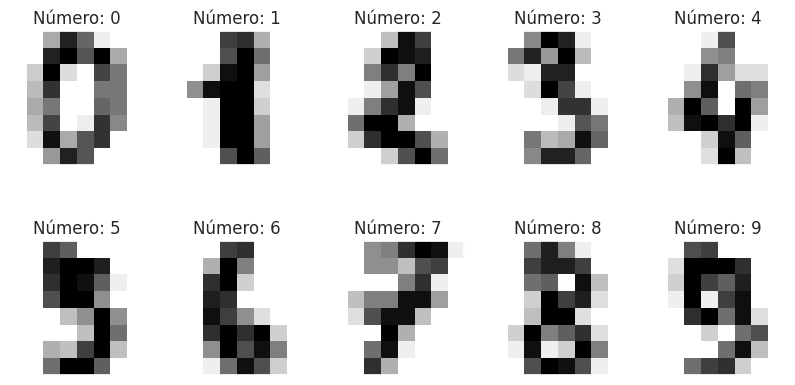

In [4]:
# Creamos la figura y los ejes
fig, ax = plt.subplots(2, 5, figsize = (10, 5))

# Iteramos a través de los primeros 10 dígitos
for i in range(10):
    # Configuramos el subplot correspondiente
    ax = plt.subplot(2, 5, i + 1)
    # Mostramos la imagen del dígito en escala de grises
    ax.imshow(digits.images[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
    # Agregamos el título con el número correspondiente
    ax.set_title('Número: {}'.format(digits.target[i]))

    # Eliminamos los ticks de la gráfica
    ax.set_xticks([])
    ax.set_yticks([])

# Mostramos la gráfica
plt.show()

Podemos ver, con un histograma, la distribución de los dígitos en el dataset (está balanceado ✨).

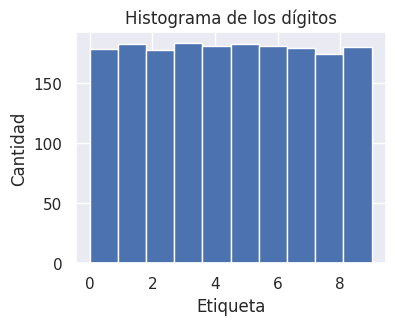

In [5]:
# Creamos la figura y los ejes
fig, ax = plt.subplots(figsize = (4, 3))

# Generamos un histograma de los dígitos
ax.hist(digits.target, bins=10)

# Configuramos los títulos y etiquetas del gráfico
ax.set_title('Histograma de los dígitos')
ax.set_xlabel('Etiqueta')
ax.set_ylabel('Cantidad')

# Mostramos el gráfico
plt.show()

En el siguiente bloque de código, creamos un modelo de SVM, y lo entrenamos con el dataset.

In [6]:
# Aplanamos las imágenes para que sean un vector de 64 elementos
n_muestras = len(digits.images)
data = digits.images.reshape((n_muestras, -1))

# Creamos el clasificador
clf = svm.SVC(gamma=0.001)

# Separamos los datos en entrenamiento y prueba (65% entrenamiento, 35% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.35, shuffle=False
)

# Entrenamos el clasificador
clf.fit(X_train, y_train)

# Predecimos los valores
predicciones = clf.predict(X_test)

In [7]:
# Calculamos una de las métricas de evaluación
precision = metrics.accuracy_score(y_test, predicciones)

# Imprimimos la precisión
print('Precisión: %f' % precision)

Precisión: 0.963434


Podemos visualizar mas detalles del performance con una matriz de confusión.

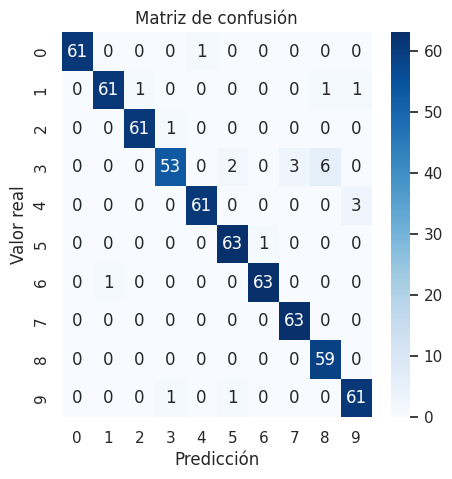

In [8]:
# Creamos la matriz de confusión
cm = metrics.confusion_matrix(y_test, predicciones)

# Creamos la figura y los ejes
fig, ax = plt.subplots(figsize = (5, 5))

# Generamos el mapa de calor para la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Configuramos los títulos y etiquetas del gráfico
ax.set_title('Matriz de confusión')
ax.set_xlabel('Predicción')
ax.set_ylabel('Valor real')

# Mostramos el gráfico
plt.show()

Ahora, entendamos un poco mas de los posibles valores en cada pixel de la imagen

In [9]:
# Pixel values range
print('Min: %i, Max: %i' % (digits.data.min(), digits.data.max()))

# Set of values for each pixel
print('Unique values: %s' % np.unique(digits.data))

Min: 0, Max: 16
Unique values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


Instrucciones para genera tu propios dígitos:
1. Abre paint
2. Crea una imagen de 64x64 pixeles
3. Selecciona un pincel (brush) de 8px de ancho
4. Dibuja un digito en el centro de la imagen
5. Guarda la imagen como un archivo .jpg


Con esto en mente, creamos una función que nos permita cargar una imagen con estas características, y adaptarla para que pueda ser procesada por el modelo.

In [10]:
def adapt_image(img):
    img_resize = resize(img, (8, 8))

    # Convert to grayscale
    img_resize = np.mean(img_resize, axis=2)

    # Invert colors
    img_resize = 1 - img_resize

    # Scale to 0-16
    img_resize = img_resize * 16

    # Round to nearest integer
    img_resize = np.round(img_resize)

    return img_resize

La siguiente función nos permite visualizar la imagen que acabamos de cargar, y la imagen procesada para ser utilizada por el modelo.

In [11]:
def show_resize(img):

    img_resize = adapt_image(img)

    # Show resized and original image
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax[0].set_title('Original')
    ax[1].imshow(img_resize, cmap=plt.cm.gray_r, interpolation='nearest')
    ax[1].set_title('Resized')

    # Remove ticks from the plot
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    ax[1].set_xticks([])
    ax[1].set_yticks([])

    plt.show()

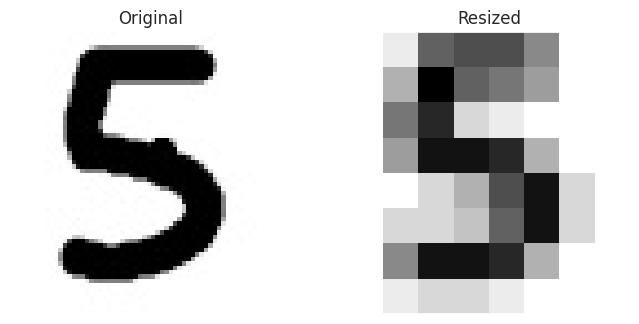

In [12]:
img = plt.imread('../examples/5.jpg')

show_resize(img)

Finalmente, una función para predecir el digito en la imagen cargada.

In [13]:
def predict_digit(img, show = True):

    img_resize = adapt_image(img)

    # Flatten image
    img_resize = img_resize.reshape(1, -1)

    # Predict digit
    pred = clf.predict(img_resize)
    print('Predicción: %i' % pred[0])

    if show:
        show_resize(img)

Predicción: 5


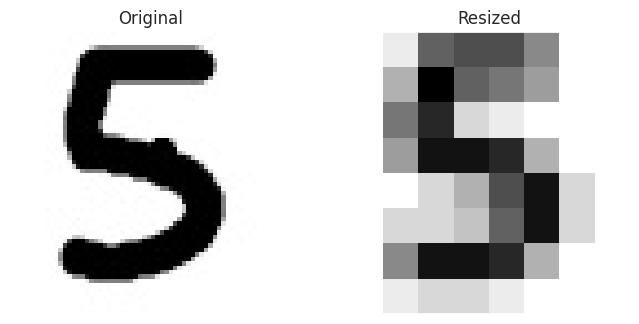

In [15]:
img = plt.imread('../examples/5.jpg')

predict_digit(img)